### 💰시계열 데이터 프로젝트: HB 테크놀러지 주가 분석 및 예측

- HB테크놀러지(코스닥, 078150.KQ)의 주가와 금 ETF(GLD) 비교

#### 1. HB테크놀러지와 금ETF 시각화 및 비교

In [5]:
import yfinance as yf
import pandas as pd

# 078150: HB 테크놀러지
# GLD: 금 ETF
columns = ['078150.KQ', 'GLD']
start_date = '2010-01-01'
end_date = '2024-06-16'

f_df = yf.download(columns, start=start_date, end=end_date)['Adj Close'].round(4)
currency_df = yf.download('KRW=X', start=start_date, end=end_date)['Adj Close'].round(4)

f_df['GLD_KR'] = f_df['GLD'] * currency_df
f_df = f_df[['078150.KQ', 'GLD_KR']]
f_df

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed


Ticker,078150.KQ,GLD_KR
Date,,
2010-01-04,1282.7677,124337.5200
2010-01-05,1307.1549,125200.6100
2010-01-06,1390.0714,126050.9040
2010-01-07,1351.0520,125769.6180
2010-01-08,1331.5421,125079.6470
...,...,...
2024-06-10,3030.0000,294482.3370
2024-06-11,3070.0000,294233.5340
2024-06-12,3100.0000,295746.7392


In [6]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3748 entries, 2010-01-04 to 2024-06-14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   078150.KQ  3547 non-null   float64
 1   GLD_KR     3631 non-null   float64
dtypes: float64(2)
memory usage: 87.8 KB


In [7]:
f_df = f_df.rename(columns={'078150.KQ': 'HBTechnology', 'GLD_KR': 'Gold_ETF'})
f_df

Ticker,HBTechnology,Gold_ETF
Date,,
2010-01-04,1282.7677,124337.5200
2010-01-05,1307.1549,125200.6100
2010-01-06,1390.0714,126050.9040
2010-01-07,1351.0520,125769.6180
2010-01-08,1331.5421,125079.6470
...,...,...
2024-06-10,3030.0000,294482.3370
2024-06-11,3070.0000,294233.5340
2024-06-12,3100.0000,295746.7392


In [8]:
f_df = f_df.dropna()
f_df

Ticker,HBTechnology,Gold_ETF
Date,,
2010-01-04,1282.7677,124337.5200
2010-01-05,1307.1549,125200.6100
2010-01-06,1390.0714,126050.9040
2010-01-07,1351.0520,125769.6180
2010-01-08,1331.5421,125079.6470
...,...,...
2024-06-10,3030.0000,294482.3370
2024-06-11,3070.0000,294233.5340
2024-06-12,3100.0000,295746.7392


- 각 시계열 데이터를 시각화합니다.

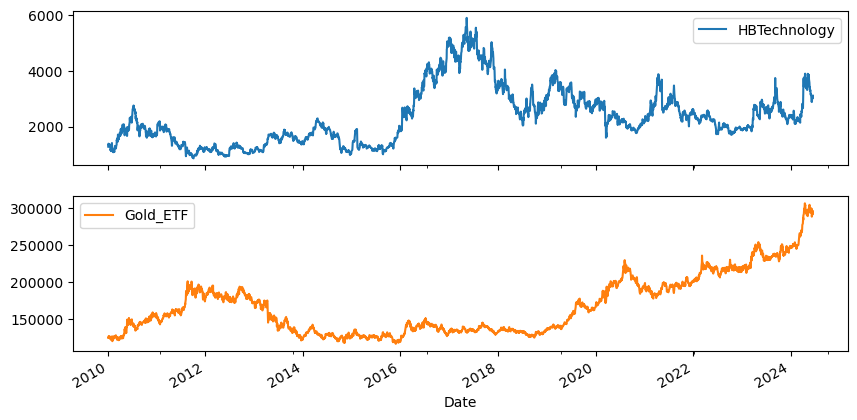

In [9]:
import matplotlib.pyplot as plt

f_df.plot(figsize=(10, 5), subplots=True)
plt.show()

- HB 테크놀러지의 경우, 2017년 LCD 업황 호조에 따라 주가가 약 6,000원대로 고점을 기록한 바 있으나, 이후 차츰 하락하는 추세를 보였습니다.

- 각 시계열 데이터에 차분을 진행하여 시각화합니다.

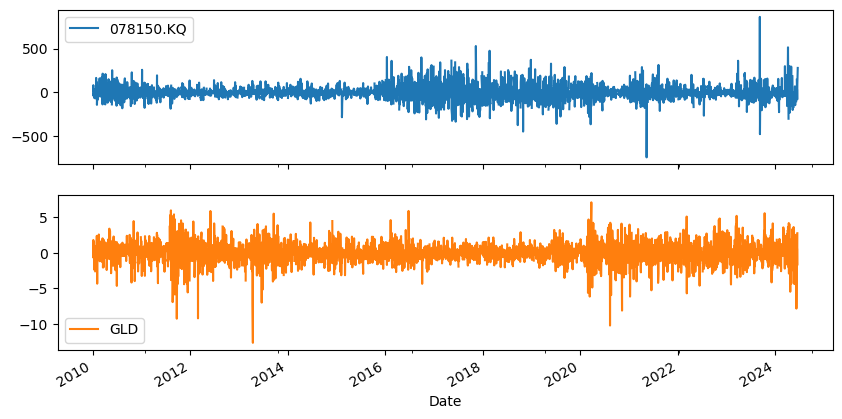

In [4]:
f_df.diff().plot(figsize=(10, 5), subplots=True)
plt.show()

- 차분을 진행하여 시각화한 결과, HB 테크놀러지의 변동폭이 2021년과 2024년 초를 제외하면 크게 나타나지는 않았습니다.

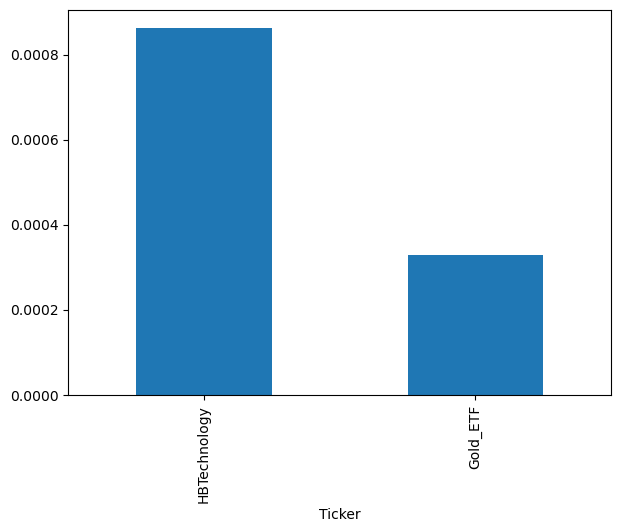

In [14]:
f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))
plt.show()

- 하지만 금 ETF와 비교해보았을 때 HB테크놀러지의 주가는 변화율이 상대적으로 2배 이상 크게 나타났습니다.

In [11]:
import numpy as np

# 수익률 계산
rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df

Ticker,HBTechnology,Gold_ETF
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.018833,0.006918
2010-01-06,0.061502,0.006768
2010-01-07,-0.028472,-0.002234
2010-01-08,-0.014546,-0.005501
...,...,...
2024-06-10,0.049038,0.019184
2024-06-11,0.013115,-0.000845
2024-06-12,0.009725,0.005130


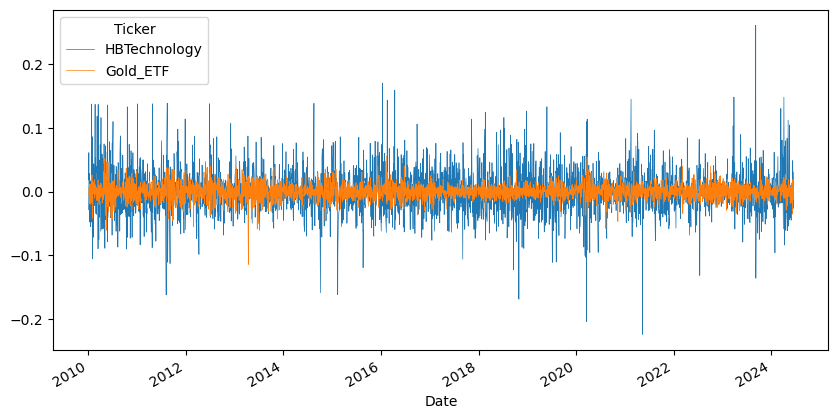

In [13]:
rate_f_df[['HBTechnology', 'Gold_ETF']].plot(figsize=(10, 5), lw=0.5)
plt.show()

- 수익률을 시각화해보았을 때, HB테크놀러지의 수익률 변동성이 금 ETF의 수익률 변동성보다 크게 나타났습니다.

In [15]:
rate_f_df.mean() * 252

Ticker
HBTechnology    0.065202
Gold_ETF        0.063832
dtype: float64

- 연율화를 진행하여 수익을 비교해본 결과, HB 테크놀러지의 수익률은 금ETF의 수익률과 비슷한 수치를 보였습니다.

In [16]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [17]:
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

,vif_score,feature
0,1.000944,HBTechnology
1,1.000944,Gold_ETF


- vif를 통해 다중공선성을 확인해보았지만 HB테크놀러지의 주가와 금 ETF의 주가 사이의 다중공선성 문제는 발생하지 않았습니다.

- `rate_f_df`는 `f_df`에서의 수익률을 구한 뒤 `np.log()`를 통해 로그로 변환한 결과입니다.
- 두 데이터프레임에서의 각 컬럼별 분포를 확인한 결과는 아래와 같습니다.

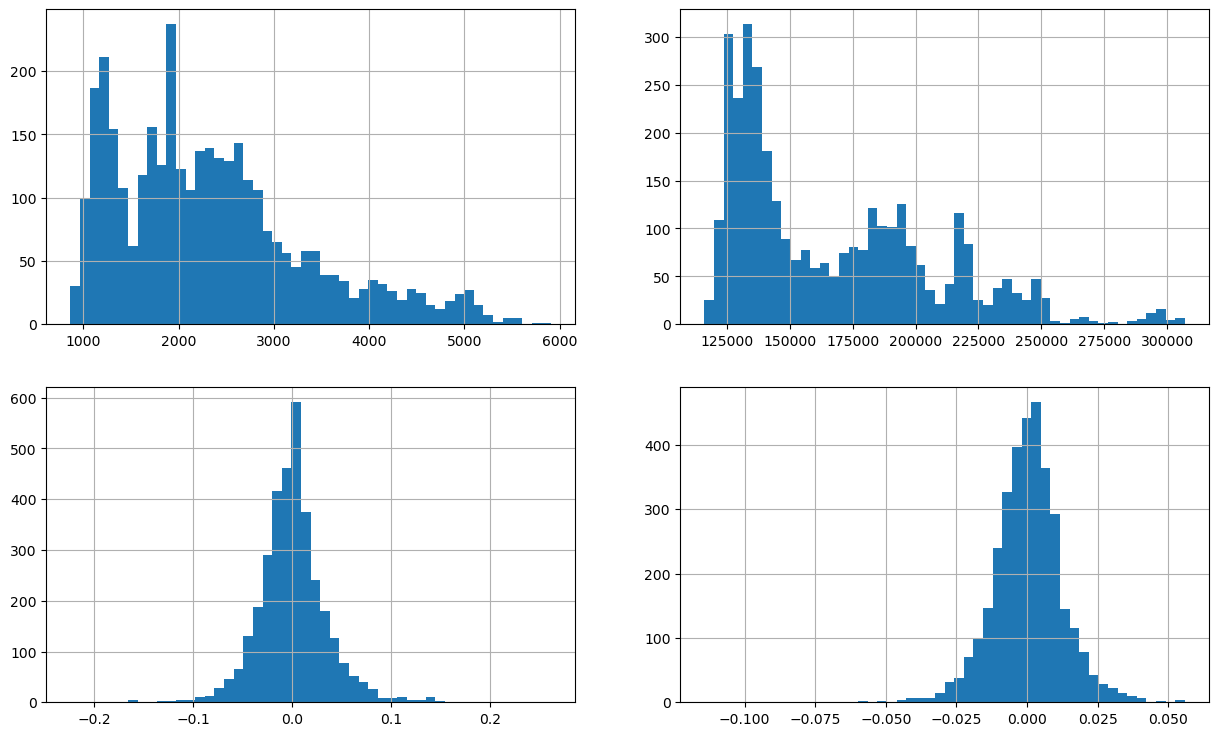

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))

f_df.HBTechnology.hist(ax=ax[0][0], bins=50)
f_df.Gold_ETF.hist(ax=ax[0][1], bins=50)

rate_f_df.HBTechnology.hist(ax=ax[1][0], bins=50)
rate_f_df.Gold_ETF.hist(ax=ax[1][1], bins=50)

plt.show()

- 일간 수익률입니다.

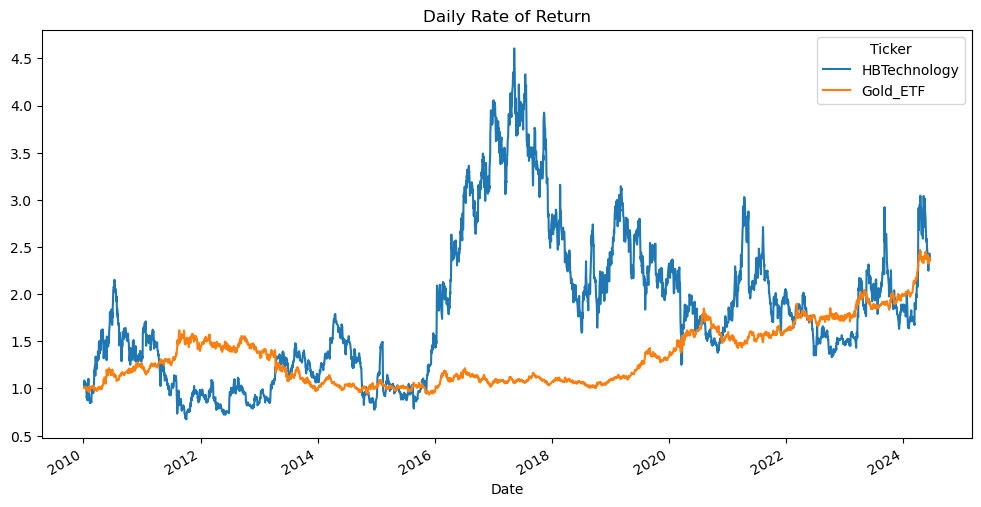

In [20]:
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.title('Daily Rate of Return')
plt.show()

- 월간 수익률입니다.

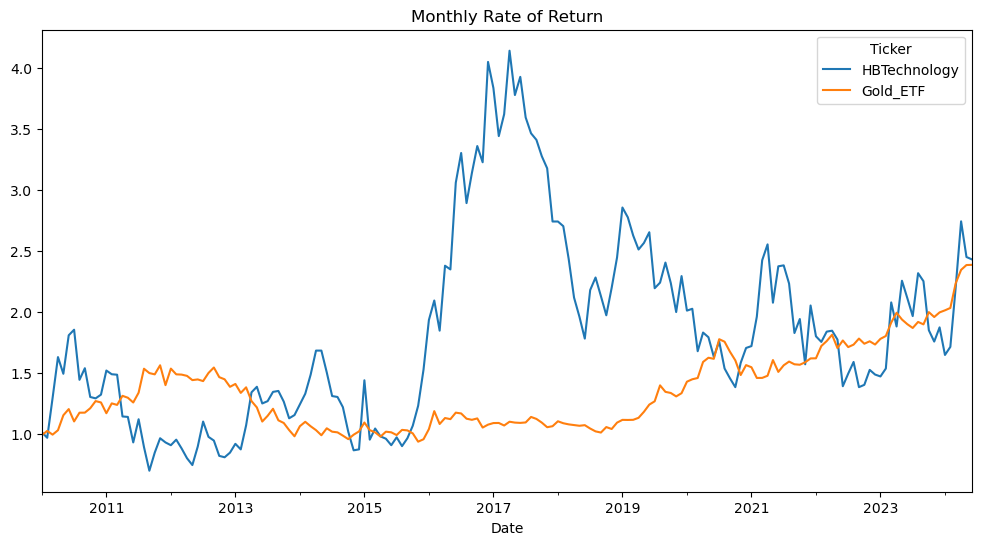

In [21]:
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.title('Monthly Rate of Return')
plt.show()

#### 2. HB테크놀러지 주가에 대한 심층 분석

In [22]:
h_df = f_df[['HBTechnology']]
h_df

Ticker,HBTechnology
Date,
2010-01-04,1282.7677
2010-01-05,1307.1549
2010-01-06,1390.0714
2010-01-07,1351.0520
2010-01-08,1331.5421
...,...
2024-06-10,3030.0000
2024-06-11,3070.0000
2024-06-12,3100.0000


In [23]:
window = 20

h_df['min'] = h_df['HBTechnology'].rolling(window=window).min()
h_df['mean'] = h_df['HBTechnology'].rolling(window=window).mean()
h_df['median'] = h_df['HBTechnology'].rolling(window=window).median()
h_df['max'] = h_df['HBTechnology'].rolling(window=window).max()

h_df = h_df.dropna()
h_df

Ticker,HBTechnology,min,mean,median,max
Date,,,,,
2010-02-01,1414.4587,1121.812,1289.840035,1304.71625,1414.4587
2010-02-02,1273.0129,1121.812,1289.352295,1304.71625,1414.4587
2010-02-03,1170.5864,1121.812,1282.523870,1299.83880,1414.4587
2010-02-04,1204.7286,1121.812,1273.256730,1292.52265,1414.4587
2010-02-05,1199.8511,1121.812,1265.696685,1282.76780,1414.4587
...,...,...,...,...,...
2024-06-10,3030.0000,2885.000,3345.500000,3362.50000,3865.0000
2024-06-11,3070.0000,2885.000,3308.500000,3297.50000,3865.0000
2024-06-12,3100.0000,2885.000,3283.000000,3230.00000,3865.0000


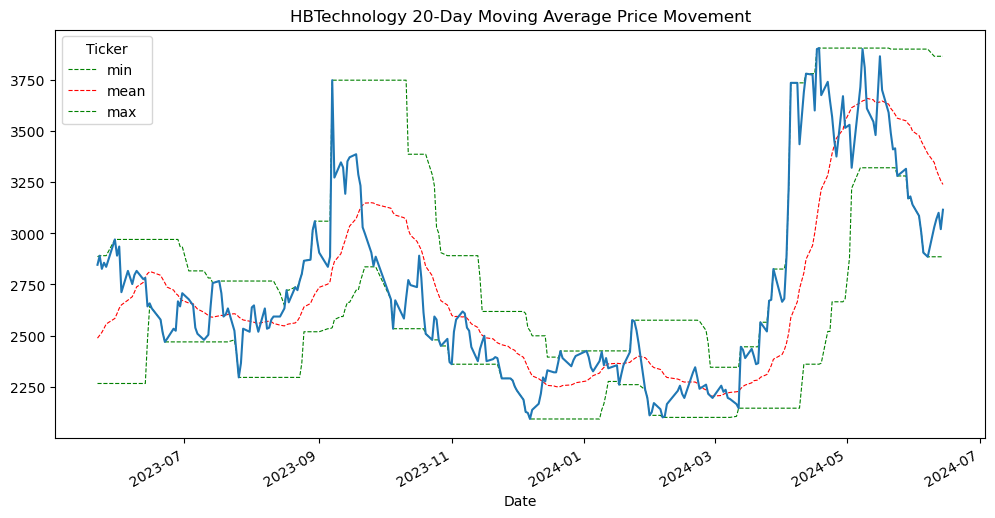

In [25]:
import matplotlib.pyplot as plt

ax = h_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
h_df['HBTechnology'].iloc[-252:].plot(ax=ax)
plt.title("HBTechnology 20-Day Moving Average Price Movement")
plt.show()

In [26]:
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

h_df['SMA1'] = h_df['HBTechnology'].rolling(window=21).mean() #short-term
h_df['SMA2'] = h_df['HBTechnology'].rolling(window=252).mean() #long-term
h_df[['HBTechnology', 'SMA1', 'SMA2']].tail()

C:\Users\hyuns\AppData\Local\Temp\ipykernel_33024\2501766309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df['SMA1'] = h_df['HBTechnology'].rolling(window=21).mean() #short-term
C:\Users\hyuns\AppData\Local\Temp\ipykernel_33024\2501766309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df['SMA2'] = h_df['HBTechnology'].rolling(window=252).mean() #long-term


Ticker,HBTechnology,SMA1,SMA2
Date,,,
2024-06-10,3030.0,3371.904762,2711.561838
2024-06-11,3070.0,3332.380952,2713.907462
2024-06-12,3100.0,3298.571429,2715.644201
2024-06-13,3020.0,3270.476190,2716.178157
2024-06-14,3115.0,3250.000000,2717.089097


- HB테크놀러지의 주가를 기술 분석하여, 골든 크로스와 데드 크로스를 파악합니다.

C:\Users\hyuns\AppData\Local\Temp\ipykernel_33024\1825675505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df['positions'] = np.where(h_df['SMA1'] > h_df['SMA2'], 1, -1)  # 1: buy , -1: sell /


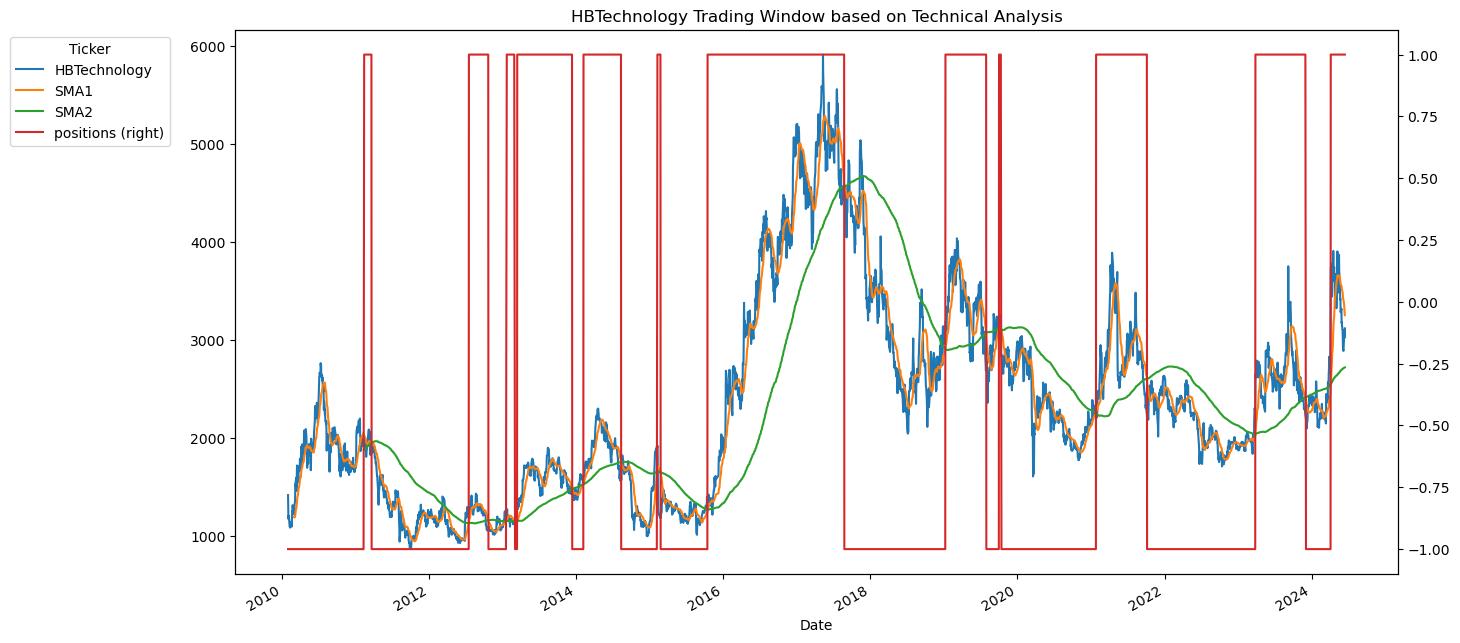

In [28]:
h_df['positions'] = np.where(h_df['SMA1'] > h_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = h_df[['HBTechnology', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 8), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("HBTechnology Trading Window based on Technical Analysis")
plt.show()

#### 3. ACF, PACF 확인 및 ARIMA 모델을 통한 머신러닝 학습

- 원본 주가의 ACF와 차분을 진행한 데이터의 PACF를 시각화해봅니다.

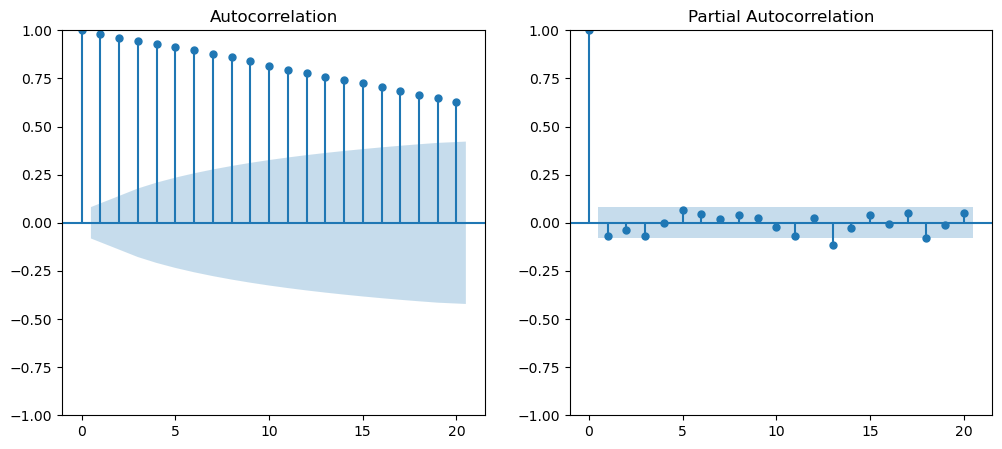

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax = ax.flatten()

plot_acf(h_df, lags=20, ax=ax[0])
plot_pacf(h_df.diff().dropna(), lags=20, ax=ax[1])

plt.show()

- HB테크놀러지의 주가 데이터로부터 ACF를 시각화하였을 때, 시차가 증가함에 따라 점차 감소하기 때문에 추세를 가진 비정상 시계열로 볼 수 있습니다.
- 따라서 차분을 진행하여 PACF를 시각화하였으며, 표준정규분포 영역 내에 들어가는 첫 번째 지점인 절단점의 값이 1이므로,  
  AR모델의 차수는 0으로 설정하는 것이 바람직하다고 판단됩니다.

- 2022년 1월 1일을 기준으로 이후의 주가 데이터를 기준으로 ARIMA 모델을 학습하기 위해 데이터프레임을 슬라이싱합니다.

In [29]:
h_df = h_df['2022-01-01':]
h_df

Ticker,HBTechnology,min,mean,median,max,SMA1,SMA2,positions
Date,,,,,,,,
2022-01-04,2595.7109,2360.1833,2502.235885,2477.94715,2630.0586,2489.396352,2712.754319,-1
2022-01-05,2517.2017,2428.8789,2510.086805,2487.76085,2630.0586,2502.948543,2714.428870,-1
2022-01-06,2468.1335,2428.8789,2511.558860,2487.76085,2630.0586,2508.089029,2715.733463,-1
2022-01-07,2497.5745,2428.8789,2513.276255,2495.12110,2630.0586,2510.892938,2716.882285,-1
2022-01-10,2428.8789,2428.8789,2513.030920,2495.12110,2630.0586,2509.257333,2717.524846,-1
...,...,...,...,...,...,...,...,...
2024-06-10,3030.0000,2885.0000,3345.500000,3362.50000,3865.0000,3371.904762,2711.561838,1
2024-06-11,3070.0000,2885.0000,3308.500000,3297.50000,3865.0000,3332.380952,2713.907462,1
2024-06-12,3100.0000,2885.0000,3283.000000,3230.00000,3865.0000,3298.571429,2715.644201,1


- 학습 데이터와 테스트 데이터를 분리합니다.

In [30]:
# 데이터의 80퍼센트를 train, 나머지를 test데이터로 분리
y_train = h_df.HBTechnology[:int(0.8 * len(h_df))]
y_test = h_df.HBTechnology[int(0.8 * len(h_df)):]

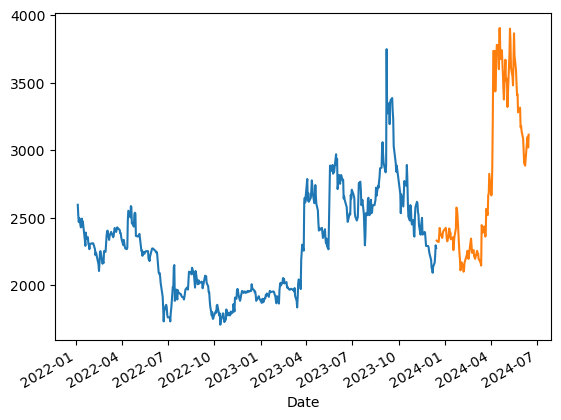

In [31]:
y_train.plot()
y_test.plot()
plt.show()

In [32]:
from pmdarima.arima import ndiffs
# KPSS(Kwaiatkowski-Phillips-Schmidt-Shin)
# 차분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다."로 설정한 뒤
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다.

# alpha: 유의수준(기각 영가설 설정, 주로 0.05로 설정)
# test: 단위근 검정 방법 설정
# max_d: 최대차분 횟수 설정
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

# 최적 차분 횟수
print(f'd = {n_diffs}')

d = 1


In [33]:
import pmdarima as pm

model = pm.auto_arima(y=y_train, 
                      d=1, 
                      start_p=0, max_p=10, 
                      start_q=0, max_q=10, 
                      m=1, seasonal=False, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5337.908, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5333.656, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5333.626, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5335.943, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5335.625, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5335.621, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5337.460, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5331.666, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5333.665, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5333.663, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5331.695, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5335.505, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.858 seconds


In [34]:
model.fit(y_train)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [35]:
# Prob(Q), 융-박스 검정 통계량
# 영가설: 잔차가 백색잡음 시계열을 따른다.
# 0.05 이상: 서로 독립이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량
# 영가설: 잔차가 이분산성을 띠지 않는다.
# 0.05 이상: 잔차의 분산이 일정하다.

# Prob(JB), 자크-베라 검정 통계량
# 영가설: 잔차가 정규성을 따른다.
# 0.05 이상: 일정한 평균과 분산을 따른다.

# Skew(쏠린 정도, 왜도)
# 0에 가까워야 한다.

# Kurtosis(뾰족한 정도, 첨도)
# 3에 가까워야 한다.

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  461
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2663.833
Date:                Mon, 17 Jun 2024   AIC                           5331.666
Time:                        22:07:39   BIC                           5339.929
Sample:                             0   HQIC                          5334.920
                                - 461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1172      0.018     -6.491      0.000      -0.153      -0.082
sigma2      6297.3692    100.753     62.503      0.000    6099.897    6494.841
Ljung-Box (L1) (Q):                   0.00   Jarque-

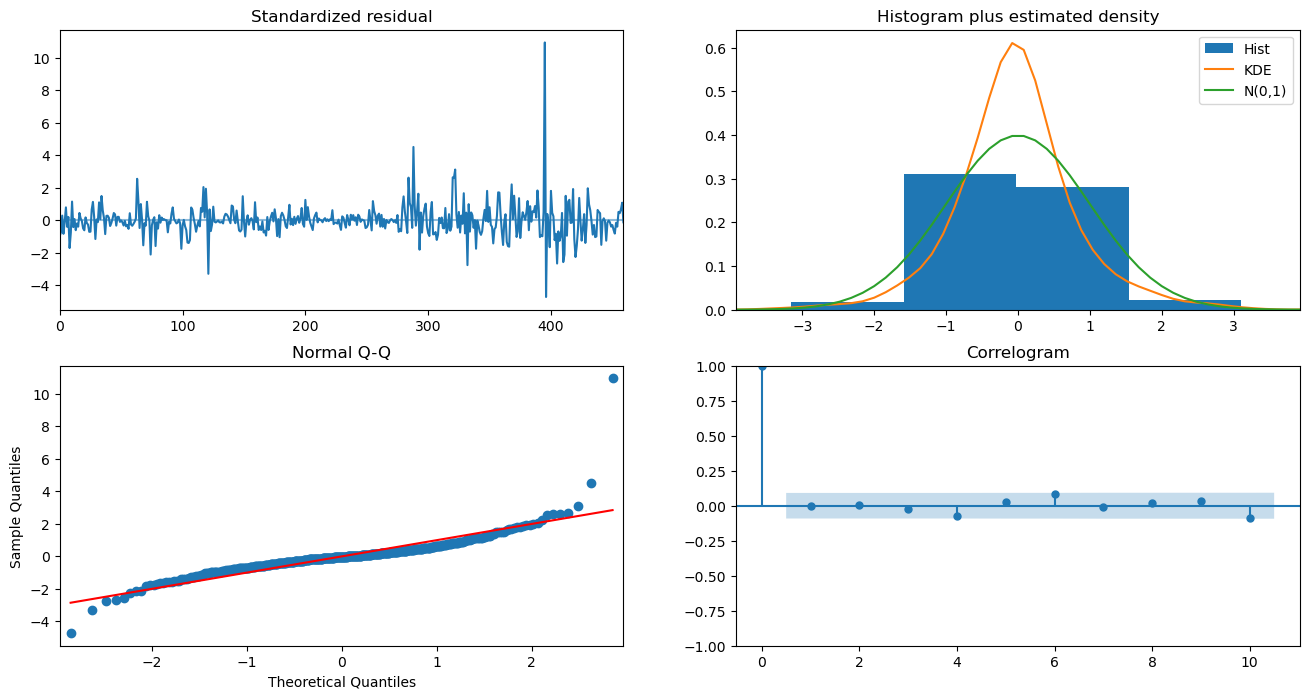

In [36]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [38]:
prediction, conf_int = model.predict(n_periods=1, return_conf_int=True)
print(conf_int)
print(prediction)

[[2121.24629648 2432.31596288]]
461    2276.78113
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [39]:
prediction.tolist()[0]

2276.7811296810596

- 모델이 예측한 값을 반환하는 함수를 정의합니다.

In [41]:
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

- 반환된 예측값을 담을 리스트(`p_list`)를 선언하여 담아주며, 예측을 수행할 때마다 `model`에 `update()`를 진행합니다.

In [42]:
p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


- 실제 테스트 데이터와 모델의 예측값을 담은 `p_list`를 하나의 데이터프레임으로 묶어줍니다.

In [43]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
Date,,
2023-12-15,2330.1687,2276.781130
2023-12-18,2320.2532,2323.914082
2023-12-19,2320.2532,2320.681866
2023-12-20,2369.8313,2320.303455
2023-12-21,2424.3672,2364.018566
...,...,...
2024-06-10,3030.0000,2886.758094
2024-06-11,3070.0000,3020.408643
2024-06-12,3100.0000,3066.832146


- 모델의 예측값과 실제 정답을 시각화하여 비교합니다.

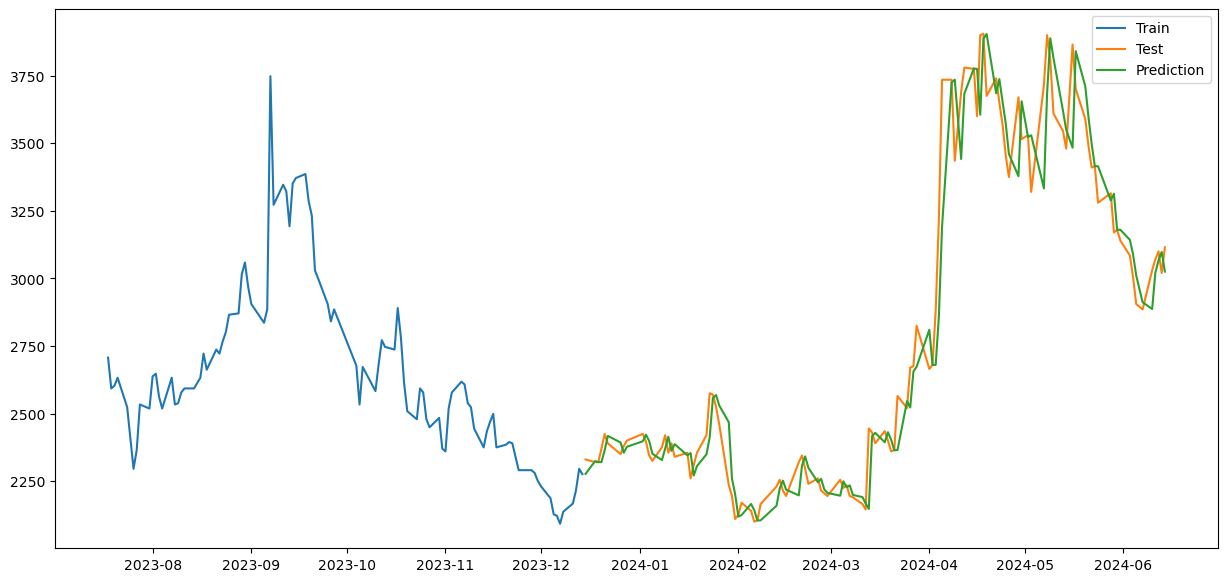

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

# 예측된 결과와 정답 비교 시각화
plt.plot(y_train.iloc[-100:], label='Train')
plt.plot(y_test.iloc[-639:], label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

- `MAPE()` 함수를 정의하여 오차의 백분율 값을 구합니다.

In [45]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 2.9003


#### 4. `Prophet()`을 사용한 주가 예측(딥러닝)

In [48]:
pre_h_df = h_df.copy()
pre_h_df = pre_h_df.HBTechnology.reset_index()
pre_h_df

,Date,HBTechnology
0,2022-01-04,2595.7109
1,2022-01-05,2517.2017
2,2022-01-06,2468.1335
3,2022-01-07,2497.5745
4,2022-01-10,2428.8789
...,...,...
572,2024-06-10,3030.0000
573,2024-06-11,3070.0000
574,2024-06-12,3100.0000
575,2024-06-13,3020.0000


- `Prophet()`에 전달하기 위해 컬럼의 이름을 형식에 맞게 바꿔줍니다.

In [50]:
pre_h_df = pre_h_df.rename(columns={'Date': 'ds', 'HBTechnology': 'y'})
pre_h_df

,ds,y
0,2022-01-04,2595.7109
1,2022-01-05,2517.2017
2,2022-01-06,2468.1335
3,2022-01-07,2497.5745
4,2022-01-10,2428.8789
...,...,...
572,2024-06-10,3030.0000
573,2024-06-11,3070.0000
574,2024-06-12,3100.0000
575,2024-06-13,3020.0000


- `Prophet()` 모델로 학습을 진행합니다.

In [51]:
from prophet import Prophet

model = Prophet().fit(pre_h_df)

22:14:06 - cmdstanpy - INFO - Chain [1] start processing
22:14:07 - cmdstanpy - INFO - Chain [1] done processing


- `make_future_dataframe()`을 통해 미래의 주가를 예측합니다.

In [52]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-04,2554.042449,2326.041560,2757.086224
1,2022-01-05,2545.579040,2331.571286,2748.325234
2,2022-01-06,2558.422241,2355.946046,2772.133686
3,2022-01-07,2542.063940,2314.859350,2749.140678
4,2022-01-10,2493.637732,2283.529279,2709.465073
...,...,...,...,...
937,2025-06-10,4307.486364,3570.542861,5020.766053
938,2025-06-11,4299.455758,3524.978661,5023.432834
939,2025-06-12,4314.027791,3580.711891,5013.283768
940,2025-06-13,4300.746158,3552.405377,5079.605476


- 실제 HBTechnology의 주가와, 모델이 예측한 미래의 주가를 합쳐 시각화합니다.

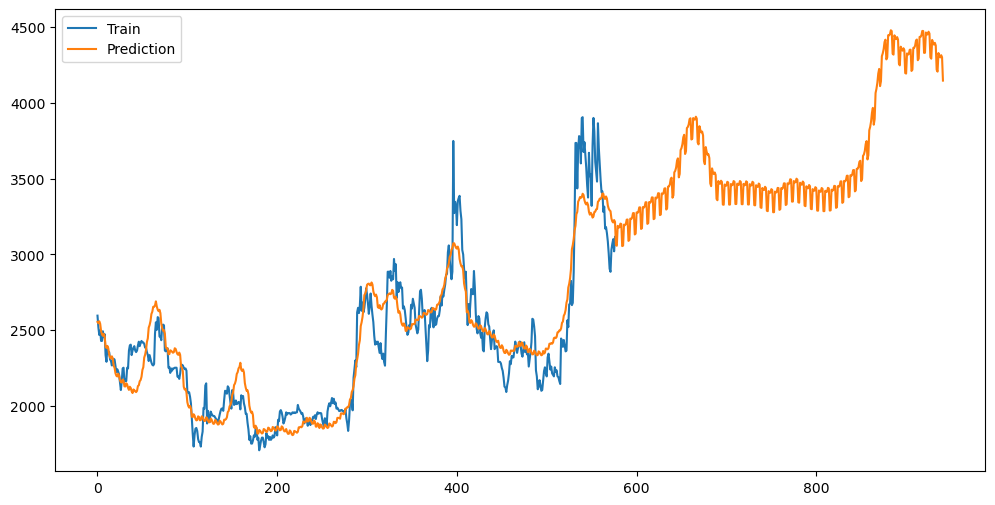

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(pre_h_df[['y']], label='Train')
plt.plot(forecast[['yhat']], label='Prediction')
plt.legend()
plt.show()

- 모델이 예측한 바에 따르면, HBTechnology의 주가는 현재 반등세를 이어나가며 상승했다가,  
  잠시 감소하여 머무른 뒤 새로운 고점을 돌파할 것으로 예상됩니다.
- 모델이 예측한 값의 신뢰구간은 아래와 같습니다.

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


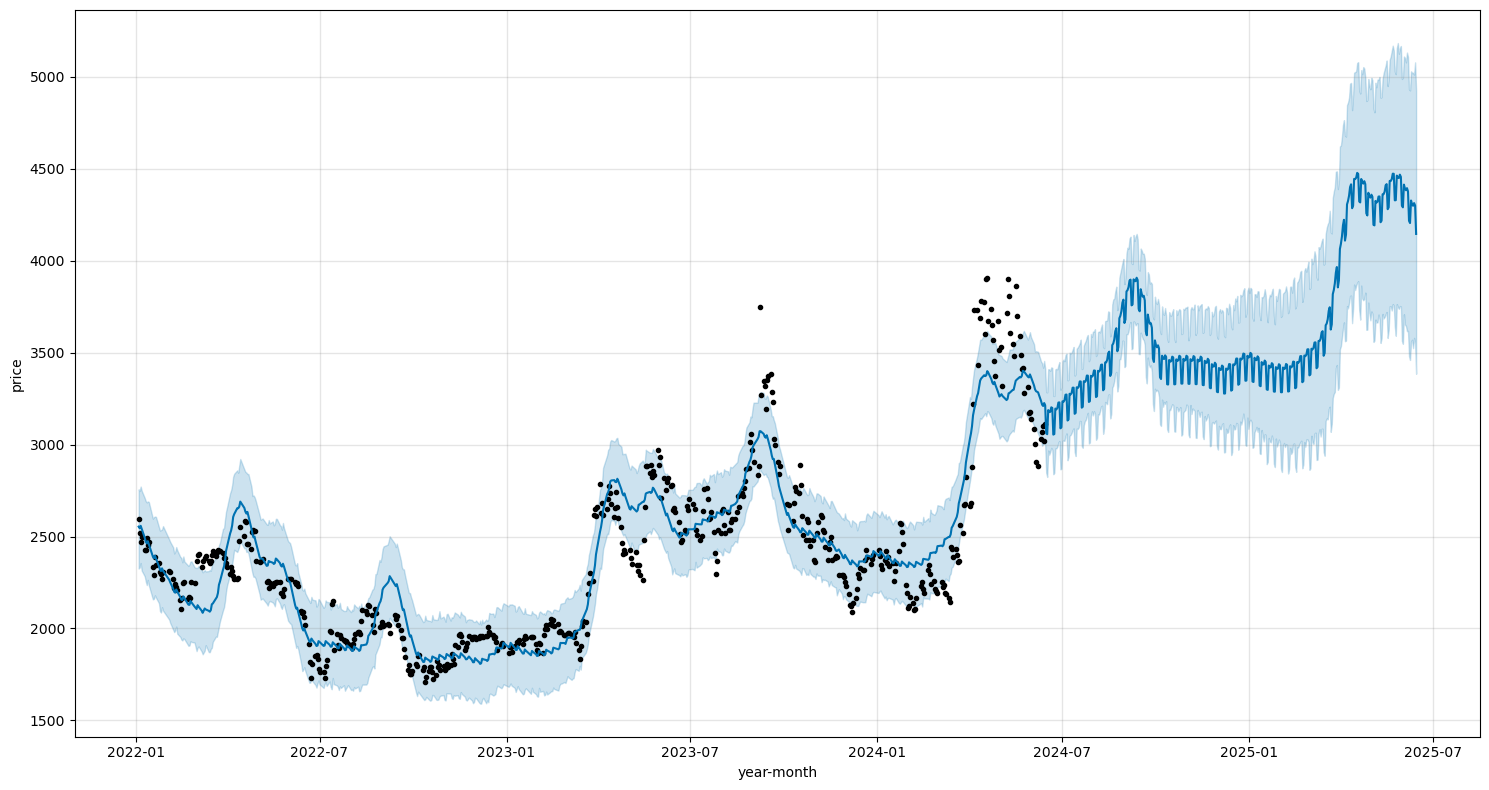

In [54]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

- 모델이 예측한 값의 전체 추세와, 주간 계절성(Weekly seasonality), 연간 계절성(Yearly seasonality)은 아래와 같습니다.

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

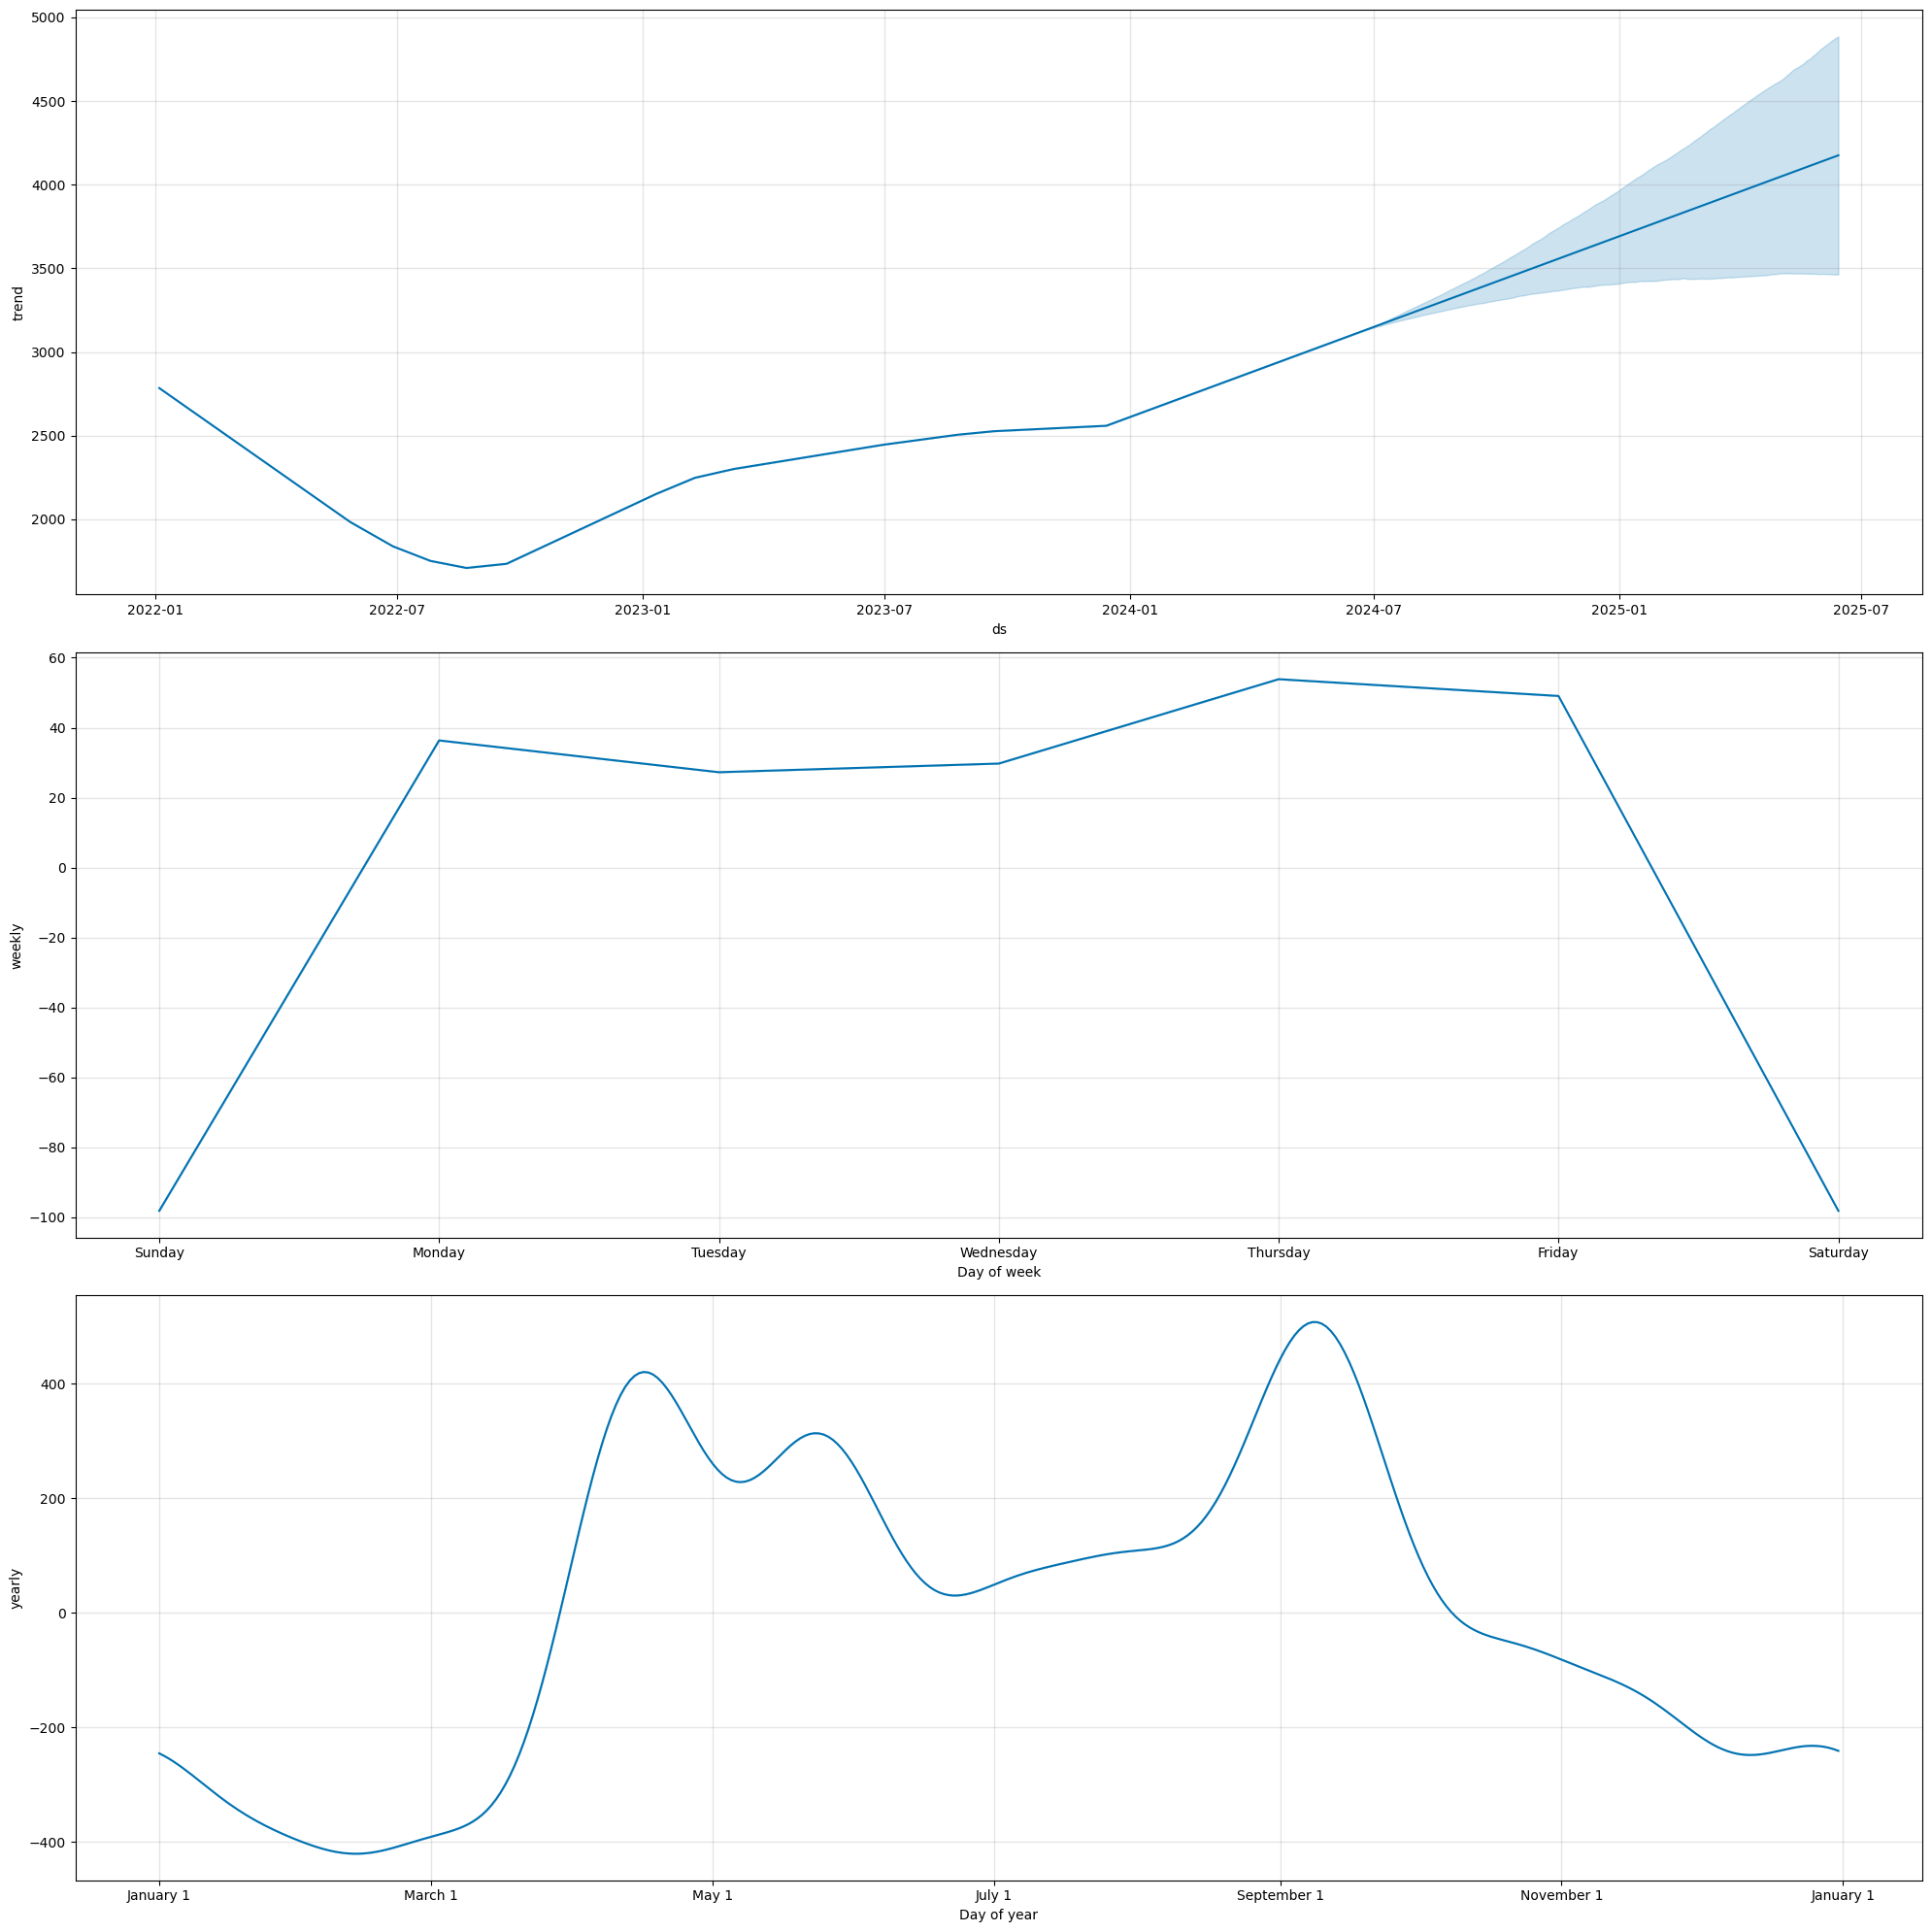

In [55]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

- 모델이 예측한 바에 따르면, 앞으로 상승하는 추세를 보일 것이며,  
  요일별 계절성의 경우 시장이 열리지 않는 주말을 제외한 평일 영업일에는 모두 비슷한 수치를 보이며 뚜렷한 계절성을 나타내지 않았습니다.
- 반면 연간 계절성의 경우 4월과 9월에 특히 높은 수치를 보이는 양상을 띠었는데, 이는 아래와 같이 설명할 수 있습니다.
- HB테크놀러지는 디스플레이/반도체 관련 기업으로, 디스플레이 관련 산업이 활기를 띨 때 주로 주가가 상승합니다.
- 특히 2월에 삼성의 신제품 발표가 있고 3월에 애플의 봄 이벤트가 있을 수 있기 때문에,  
  이 발표들이 디스플레이 관련 주가에 긍정적인 영향을 미치고, 그 효과가 4월까지 이어질 수 있다고 판단됩니다.
- 또한 애플의 주요 신제품 발표가 9월에 있기 때문에,  
  새로운 iPhone 출시와 관련된 기대감과 발표 후의 시장 반응이 디스플레이 관련 주가에 긍정적인 영향을 줄 수 있습니다.

In [56]:
train_df = pre_h_df.iloc[:int(len(pre_h_df) * 0.8)]
train_df

,ds,y
0,2022-01-04,2595.7109
1,2022-01-05,2517.2017
2,2022-01-06,2468.1335
3,2022-01-07,2497.5745
4,2022-01-10,2428.8789
...,...,...
456,2023-12-08,2136.8142
457,2023-12-11,2166.5613
458,2023-12-12,2216.1392
459,2023-12-13,2295.4641


In [57]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_h_df) * 0.8)
test_len = int(len(pre_h_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_h_df.iloc[: train_len]
test_df = pre_h_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes

22:22:57 - cmdstanpy - INFO - Chain [1] start processing
22:22:57 - cmdstanpy - INFO - Chain [1] done processing
22:23:02 - cmdstanpy - INFO - Chain [1] start processing
22:23:02 - cmdstanpy - INFO - Chain [1] done processing
22:23:09 - cmdstanpy - INFO - Chain [1] start processing
22:23:09 - cmdstanpy - INFO - Chain [1] done processing
22:23:15 - cmdstanpy - INFO - Chain [1] start processing
22:23:15 - cmdstanpy - INFO - Chain [1] done processing
22:23:20 - cmdstanpy - INFO - Chain [1] start processing
22:23:20 - cmdstanpy - INFO - Chain [1] done processing
22:23:25 - cmdstanpy - INFO - Chain [1] start processing
22:23:26 - cmdstanpy - INFO - Chain [1] done processing
22:23:31 - cmdstanpy - INFO - Chain [1] start processing
22:23:31 - cmdstanpy - INFO - Chain [1] done processing
22:23:36 - cmdstanpy - INFO - Chain [1] start processing
22:23:36 - cmdstanpy - INFO - Chain [1] done processing
22:23:41 - cmdstanpy - INFO - Chain [1] start processing
22:23:41 - cmdstanpy - INFO - Chain [1]

In [58]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
0,0.05,0.05,additive,0.147954
5,0.05,1.00,multiplicative,0.148504
6,0.05,10.00,additive,0.148673
2,0.05,0.10,additive,0.148825
9,0.10,0.05,multiplicative,0.149017
11,0.10,0.10,multiplicative,0.149083
10,0.10,0.10,additive,0.149352
14,0.10,10.00,additive,0.149369
13,0.10,1.00,multiplicative,0.149426
1,0.05,0.05,multiplicative,0.149502


- 20일 단위의 교차검증 결과, `mape`가 가장 낮았을 때의 파라미터는  
  `changepoint_prior_scale=0.05, seasonality_prior_scale=0.05, seasonality_mode='additive'`일 때였습니다.
- 따라서 해당 파라미터로 `Prophet()` 모델을 생성하여 학습 및 예측을 수행해봅니다.

In [59]:
model = Prophet(changepoint_prior_scale=0.05, 
                seasonality_prior_scale=0.05, 
                seasonality_mode='additive')

model.fit(pre_h_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

22:33:06 - cmdstanpy - INFO - Chain [1] start processing
22:33:06 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2022-01-04,2557.951257,2343.507618,2799.139358
1,2022-01-05,2549.297018,2330.879654,2761.576441
2,2022-01-06,2561.922727,2358.452013,2759.454402
3,2022-01-07,2545.327609,2324.609951,2760.156722
4,2022-01-10,2496.629915,2280.471252,2709.624400
...,...,...,...,...
937,2025-06-10,4393.256263,3630.444021,5119.606901
938,2025-06-11,4385.894760,3613.681604,5074.074934
939,2025-06-12,4401.133404,3624.879440,5111.131755
940,2025-06-13,4388.518316,3637.182422,5098.626101


In [60]:
h_df = pre_h_df.copy()
h_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

h_df.index = pd.to_datetime(h_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

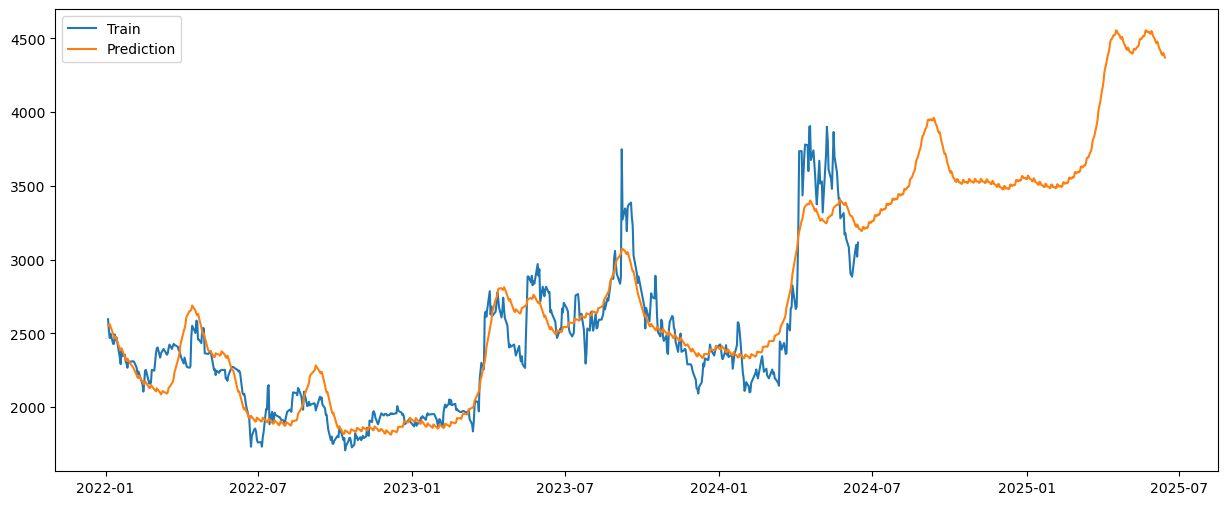

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
plt.plot(h_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

- `Prophet()` 모델의 파라미터를 조정하였을 때 전체적인 증가 추세는 이전과 유사하였으나, 변동폭이 매우 줄어들었습니다.
- 모델이 예측한 값의 신뢰구간은 아래와 같습니다.

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


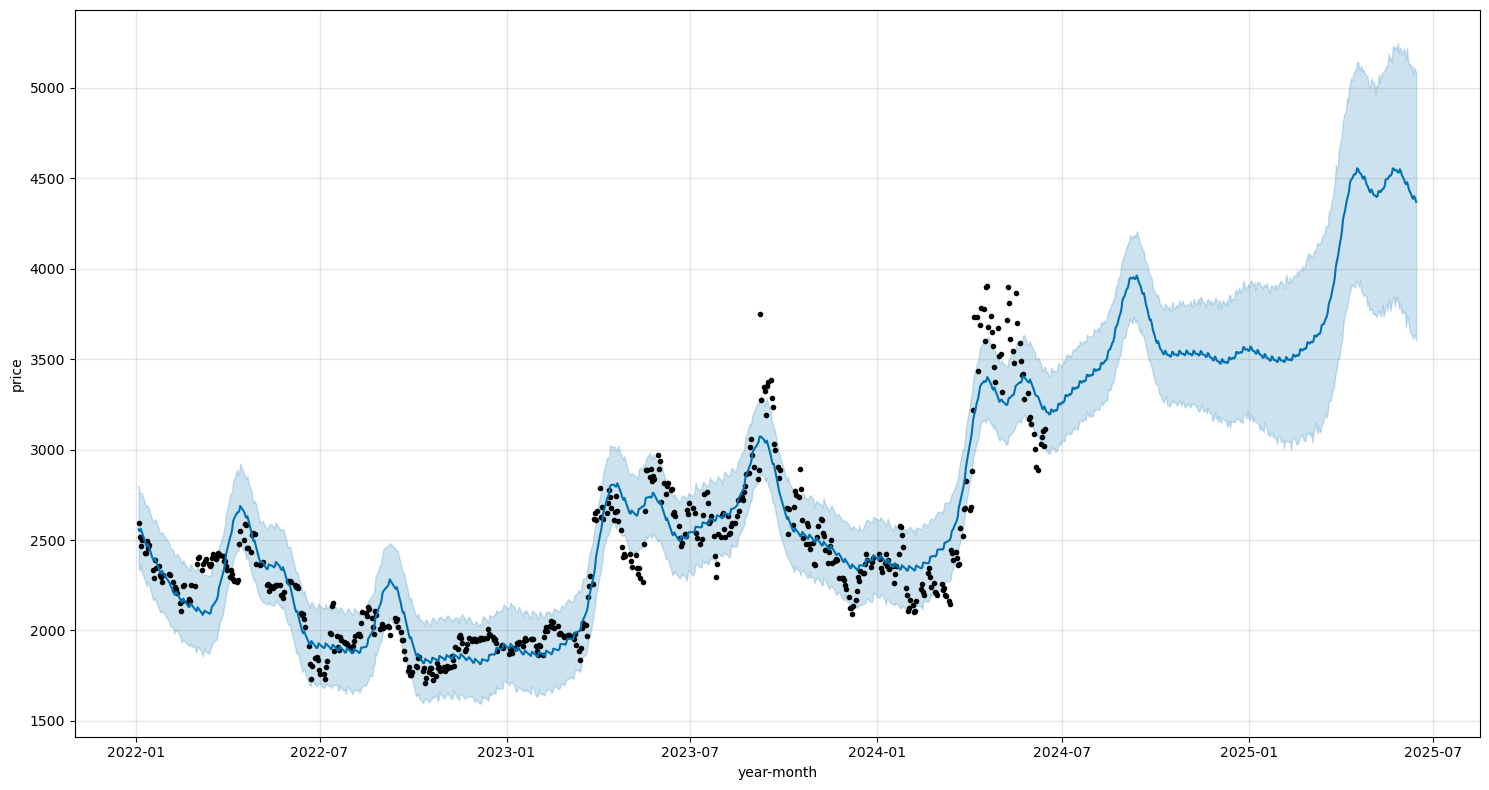

In [62]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

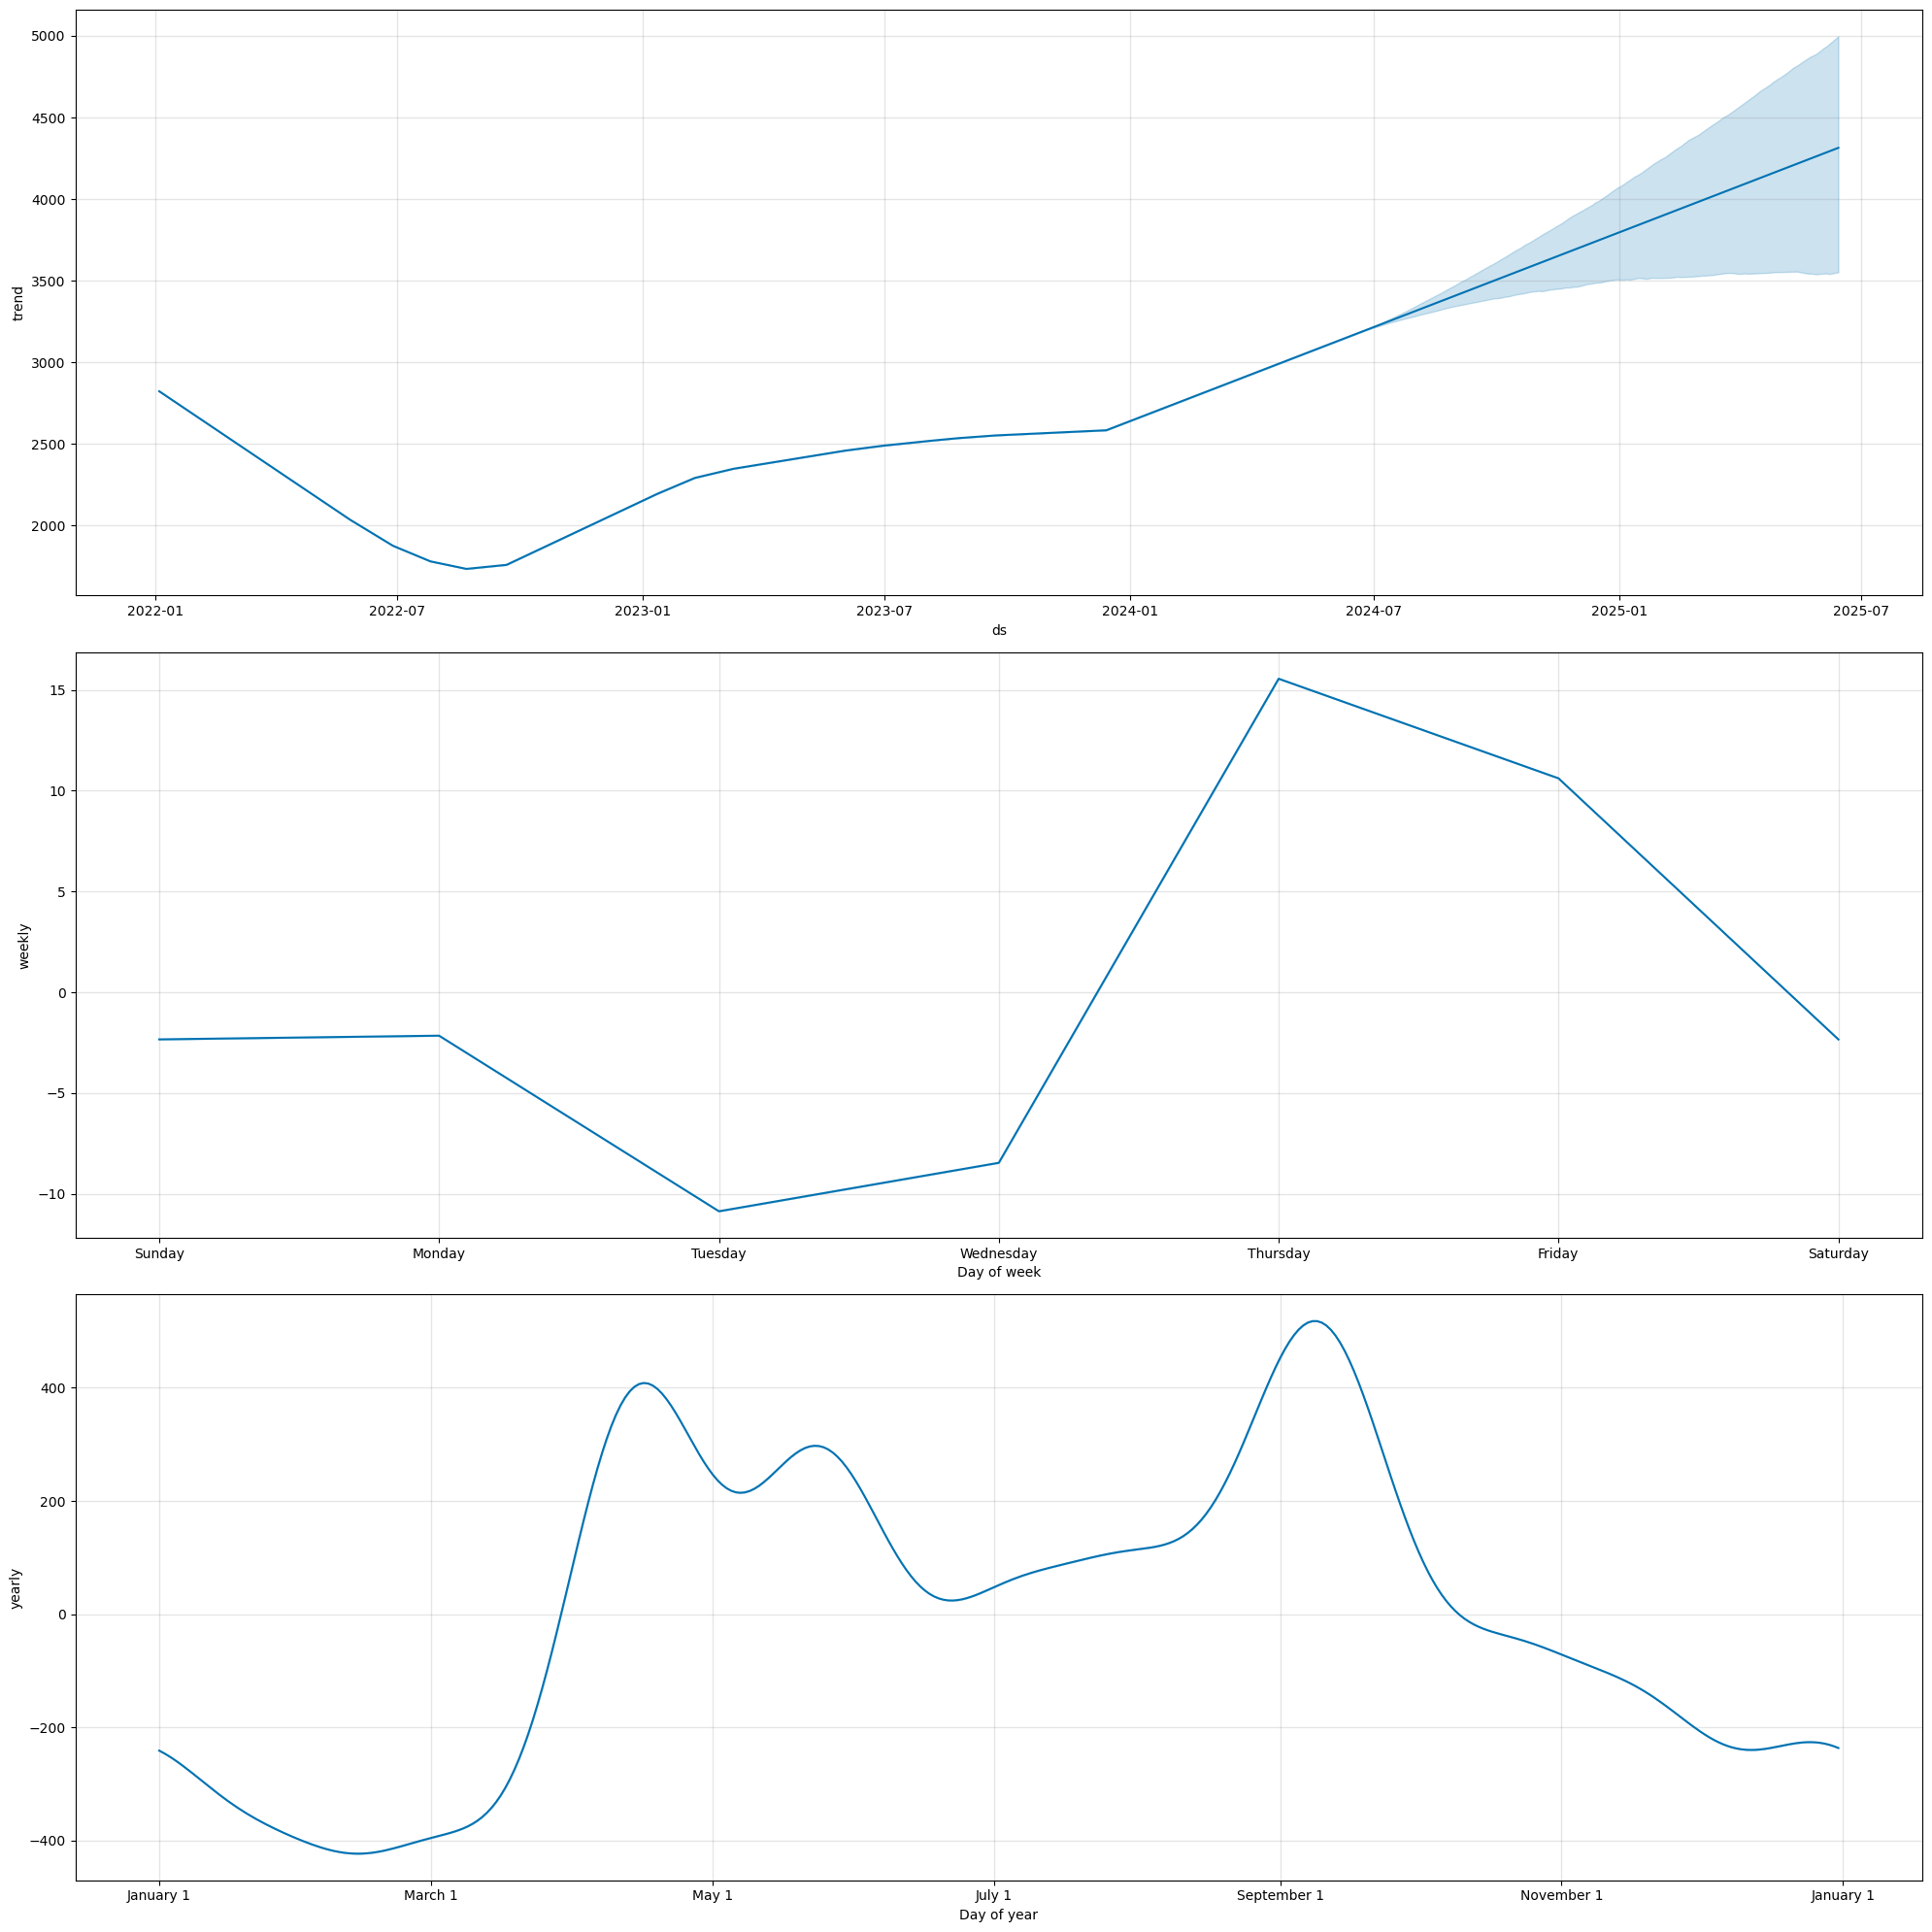

In [63]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

- 연간 계절성에서는 여전히 4월과 9월에 높은 수치를 보이는 계절성을 보였으나,  
  주간 계절성에서는 특히 목요일과 금요일에 매우 높은 수치를 보였습니다.
- 이는 아래와 같은 방식으로 설명할 수 있습니다.

1. 주간 투자자 행동 패턴

- 투자자들이 주말을 앞두고 포지션을 조정하는 경향이 있을 수 있습니다.
- 주말 동안 발생할 수 있는 불확실성을 피하기 위해 일부 투자자들은 주식을 매도하거나 매수하는 활동을 목요일과 금요일에 집중할 수 있습니다.
  
2. 기업 공시 및 뉴스 발표

- 기업들이 주로 주중 후반에 공시나 뉴스 발표를 하는 경향이 있을 수 있습니다.
- 이러한 발표가 주가에 긍정적인 영향을 미친다면, 목요일과 금요일에 주가가 상승하는 패턴을 보일 수 있습니다.

3. 주간 거래량 변화

- 주 후반에 거래량이 증가하는 경향이 있다면, 거래량이 주가를 상승시키는 요인으로 작용할 수 있습니다.
- 많은 투자자들이 목요일과 금요일에 활발하게 거래할 경우 주가에 영향을 미칠 수 있습니다.

4. 시장 심리 및 기대감

- 주말을 앞두고 긍정적인 시장 심리가 형성될 수 있습니다.
- 예를 들어, 주말 동안 긍정적인 뉴스가 나올 것을 기대하는 투자자들이 목요일과 금요일에 주식을 매수하는 경향이 있을 수 있습니다.